In [1]:
import reskit as rk
import pandas as pd
import numpy as np

This script illustrates how to run a simulation with ETHOS.RESKit.DAC.

## Preparations
In ETHOS.RESKit.DAC one can simulate each DAC plant individually with its own characteristics.
The DAC model, i.e., the relationship of weather conditions (T/RH) to energy demand and water production/consumption need to be clear and can be added to reskit.dac.data. Otherwise predefined DAC models from literature, i.e., Sendi (10.1016/j.oneear.2022.09.003) or Jajjawi (http://dx.doi.org/10.2139/ssrn.5230783) can be used. If nothing is specified the Jajjawi model will be used.
- latitude
- longitute
- capacity [tCO2/h]

These specifications are given in the form of a pandas DataFrame.

In [2]:
# Create Placements DataFrame with DAC locations and specifications

placements = pd.DataFrame(
    {
        "lon": [5.985195, 5.5, 5.5,6.3],
        "lat": [50.797254, 50.794208, 50,51],
        "capacity" : [1,10,5,5] #capacity of the DAC plant to simulate in t/h
    }
)
placements


,lon,lat,capacity
0,5.985195,50.797254,1
1,5.500000,50.794208,10
2,5.500000,50.000000,5
3,6.300000,51.000000,5


In [3]:
import os
data = pd.read_csv(os.path.join(rk.dac.data.DATAFOLDER,"LT_jajjawi.csv"),index_col=0)
data

,T,RH,totalElectricity,totalThermal,relProd,waterDesorption
0,-10.0,5,-0.573642,-3.576070,0.408678,0.136511
1,-10.0,10,-0.540579,-3.145415,0.497106,0.274053
2,-10.0,15,-0.492924,-2.852538,0.587032,0.396858
3,-10.0,20,-0.471066,-2.672325,0.672805,0.507330
4,-10.0,25,-0.460583,-2.568317,0.749496,0.610986
...,...,...,...,...,...,...
135,50.0,80,-1.003423,-4.271715,0.710683,4.188082
136,50.0,85,-1.066476,-4.581134,0.718601,4.590336
137,50.0,90,-1.102669,-4.948372,0.691001,4.957865
138,50.0,95,-1.177765,-5.245909,0.726581,5.367870


# Run the simulation workflow
RESKit will run the simulation and create an xarray Dataset with the simulation results for you.
Apart from the capacity_factor (relative productivity), RESKit also includes the coversion factors (per ton CO2) and intermediate data used to determine the capacity factor (such as air temperature and relative humidity)

In [4]:
reskit_xr = rk.dac.lt_dac_era5_wenzel2025(
    placements = placements,
    era5_path = rk.TEST_DATA["era5-like"]
)
reskit_xr

<xarray.Dataset> Size: 46kB
Dimensions:                        (location: 4, time: 140)
Coordinates:
  * location                       (location) int64 32B 0 1 2 3
  * time                           (time) datetime64[ns] 1kB 2014-12-31T23:30...
Data variables: (12/13)
    lon                            (location) float64 32B 5.985 5.5 5.5 6.3
    lat                            (location) float64 32B 50.8 50.79 50.0 51.0
    capacity                       (location) int64 32B 1 10 5 5
    surface_air_temperature        (time, location) float64 4kB 0.01979 ... 2...
    relative_humidity              (time, location) float64 4kB 96.17 ... 85.06
    capacity_factor                (time, location) float64 4kB 1.06 ... 1.091
    ...                             ...
    conversion_factor_heat         (time, location) float64 4kB -3.748 ... -3...
    conversion_factor_water        (time, location) float64 4kB 2.642 ... 2.397
    CO2_output                     (time, location) float64 4kB 1.06 ... 5.457
    H2O_output                     (time, location) float64 4kB 2.801 ... 13.08
    electricity_input              (time, location) float64 4kB 0.6488 ... 3.175
    heat_input                     (time, location) float64 4kB 3.974 ... 18.55

RESKit will output the capacity factor of each location for every hour of the simulated year.

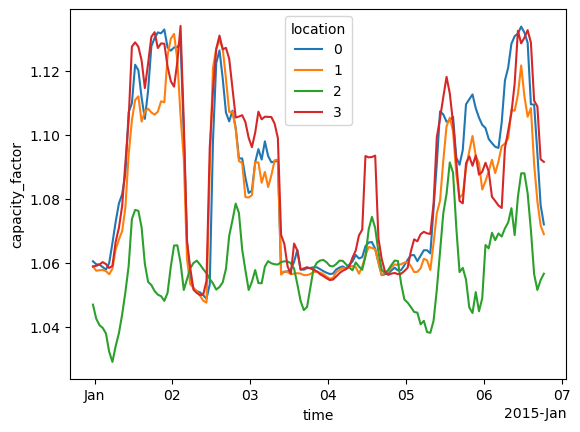

In [5]:
reskit_xr["capacity_factor"].isel(time=slice(0, 400)).plot.line(x="time")

As well as the conversion factors:

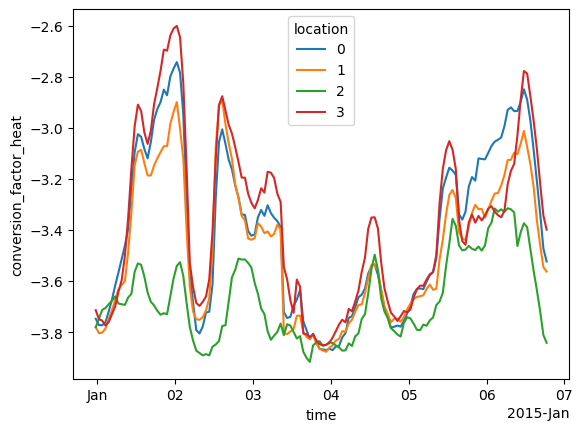

In [6]:
reskit_xr["conversion_factor_heat"].isel(time=slice(0, 400)).plot.line(x="time")

For an electrified liquid solvent (High temperature, HT)-DAC Plant:

In [9]:
reskit_xr2 = rk.dac.ht_dac_era5_wenzel2025(
    placements = placements,
    era5_path = rk.TEST_DATA["era5-like"]
)
reskit_xr2

<xarray.Dataset> Size: 46kB
Dimensions:                        (location: 4, time: 140)
Coordinates:
  * location                       (location) int64 32B 0 1 2 3
  * time                           (time) datetime64[ns] 1kB 2014-12-31T23:30...
Data variables: (12/13)
    lon                            (location) float64 32B 5.985 5.5 5.5 6.3
    lat                            (location) float64 32B 50.8 50.79 50.0 51.0
    capacity                       (location) int64 32B 1 10 5 5
    surface_air_temperature        (time, location) float64 4kB 0.01979 ... 2...
    relative_humidity              (time, location) float64 4kB 96.17 ... 85.06
    capacity_factor                (time, location) float64 4kB 0.7574 ... 0....
    ...                             ...
    conversion_factor_heat         (time, location) float64 4kB nan nan ... nan
    conversion_factor_water        (time, location) float64 4kB nan nan ... nan
    CO2_output                     (time, location) float64 4kB 0.7574 ... 3.971
    H2O_output                     (time, location) float64 4kB nan nan ... nan
    electricity_input              (time, location) float64 4kB 1.512 ... 7.809
    heat_input                     (time, location) float64 4kB nan nan ... nan

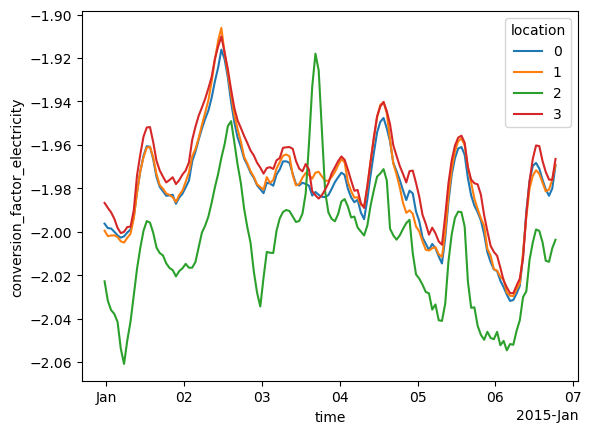

In [10]:
reskit_xr2["conversion_factor_electricity"].isel(time=slice(0, 400)).plot.line(x="time")